In [1]:
from pylab import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

import mne
import topex
import locale
import pandas as pd


ImportError: No module named topex

In [85]:
locale.setlocale(locale.LC_ALL, 'en_US')
fname = '/Volumes/dump/conf_meg/raw/fif/s01-03_Confidence_raw.fif'
fname = [fname] + [fname.replace('raw.fif', '%03i_raw.fif')%k for k in range(1,4)]
raw = mne.io.Raw(fname)

Opening raw data file /Volumes/dump/conf_meg/raw/fif/s01-03_Confidence_raw.fif...
    Read 5 compensation matrices
Current compensation grade : 0
    Range : 0 ... 1337999 =      0.000 ...  1114.999 secs
Ready.
Opening raw data file /Volumes/dump/conf_meg/raw/fif/s01-03_Confidence_001_raw.fif...
    Read 5 compensation matrices
Current compensation grade : 0
    Range : 0 ... 1337999 =      0.000 ...  1114.999 secs
Ready.
Opening raw data file /Volumes/dump/conf_meg/raw/fif/s01-03_Confidence_002_raw.fif...
    Read 5 compensation matrices
Current compensation grade : 0
    Range : 0 ... 1337999 =      0.000 ...  1114.999 secs
Ready.
Opening raw data file /Volumes/dump/conf_meg/raw/fif/s01-03_Confidence_003_raw.fif...
    Read 5 compensation matrices
Current compensation grade : 0
    Range : 0 ... 1337999 =      0.000 ...  1114.999 secs
Ready.
Adding average EEG reference projection.
1 projection items deactivated


In [86]:
trigger = mne.find_events(raw, 'UPPT001')

Reading 0 ... 5351999  =      0.000 ...  4459.999 secs...
[done]
11973 events found
Events id: [  2   3   4   5   6   7   8  10  11  16  21  22  23  24  31  32  33  40
  41  48  49  50  64  88 150 151 160 161]


In [87]:
trigs = pd.DataFrame(trigger, columns=['sample', 'next', 'value'])

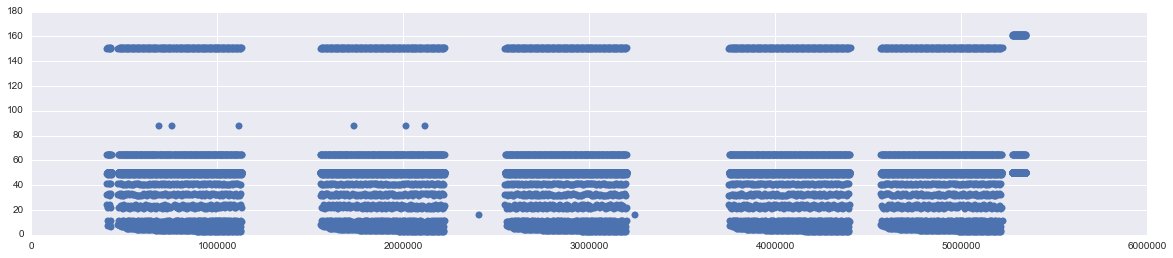

In [88]:
figure(figsize=(20, 4))
plot(trigs['sample'].values, trigs.value.values, 'o')

In [89]:
picks = mne.pick_types(raw.info, meg=True, eeg=False, eog=False, stim=True)

In [90]:
dec = trigs.query('value>=20 & value<=24')
print dec.shape

(500, 3)


In [91]:
epochs = mne.Epochs(raw, dec.values, {'1H':21, '1L':22, '2L':23, '2H':24}, -1.5, 0.5, proj=True, picks=picks,
                    baseline=None, preload=False)

500 matching events found
1 projection items activated


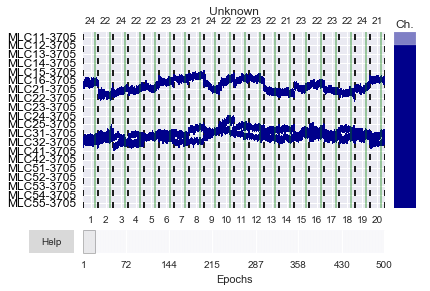

In [99]:
mne.set_log_level('WARNING')
epochs.plot()
mne.set_log_level('INFO')

In [94]:
mne.set_log_level('WARNING')
ev = epochs.average()
mne.set_log_level('INFO')

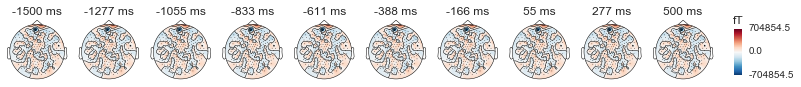

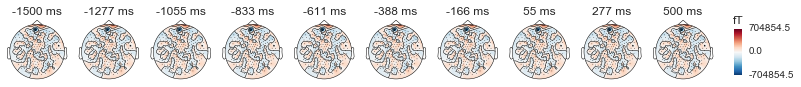

In [97]:
figure(figsize=(15, 4))
ev.plot_topomap(ch_type='mag')